<a href="https://colab.research.google.com/github/nabihsabeh85/CryptoClustering/blob/main/Crypto_Clustering_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [36]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [37]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [38]:
# Create a DataFrame with the scaled data
#market_data_df_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h" , "price_change_percentage_7d", "price_change_percentage_14d" ,
#"price_change_percentage_30d" , "price_change_percentage_60d" , "price_change_percentage_200d" , "price_change_percentage_1y"]])
#scaled_df = pd.DataFrame(market_data_df_scaled, columns=market_date_dfdf.columns)

# Create a DataFrame with the scaled data
#scaled_columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                 # "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                  #"price_change_percentage_1y"]

# Select only the numeric columns for normalization
scaled_columns = market_data_df.select_dtypes(include=['float64', 'int64']).columns

market_data_df_scaled = scaler.fit_transform(market_data_df[scaled_columns])

# Correcting the columns parameter to match the scaled data
scaled_df = pd.DataFrame(market_data_df_scaled, index=market_data_df.index, columns=scaled_columns)



# Assuming 'coinid' is a column in your original DataFrame and you want to include it in scaled_df:
#if 'coinid' in market_data_df_scaled.columns:
    # Copy the crypto names from the original data
   #scaled_df['crypto_name'] = market_data_df['crypto_name']

    # Set the 'coinid' column as index
    #scaled_df.set_index('coinid', inplace=True)

scaled_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [39]:
# Creating a list of k-values to try from 1 to 10
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
# Loop over each k value
for k in k_values:
    # Step 1: Create a KMeans model with the current k value
    kmeans_model = KMeans(n_clusters=k)

    # Step 2: Fit the model to the scaled data
    kmeans_model.fit(scaled_df)

    # Step 3: Append the model's inertia to the inertia list
    inertia.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_list': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k_values,inertia_list
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.116624
5,6,52.379237
6,7,44.406791
7,8,37.371306
8,9,32.626644
9,10,28.143354


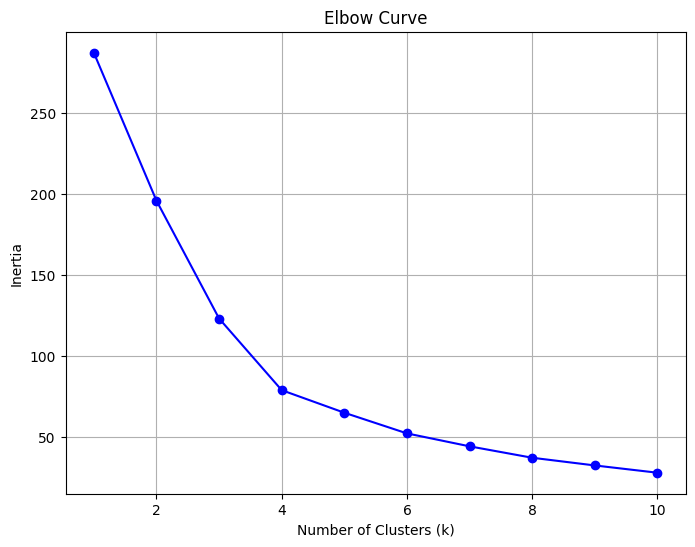

In [40]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
#elbow_df.plot.line(x="k_values",
                  # y="inertia_list",
                  # title="Elbow Curve",
                  # xticks=k)
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_list'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [41]:
# Initialize the K-Means model using the best value for k
#k = 3
model = KMeans(n_clusters=4, random_state=1)
model.fit(scaled_df)
k_value = model.predict(scaled_df)
scaled_df_predicitions = scaled_df.copy()
scaled_df_predicitions['predicted_clusters'] = k_value
scaled_df_predicitions.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [42]:
# Fit the K-Means model using the scaled data
#clusters = model.fit_predict(scaled_df)

In [43]:
# Predict the clusters to group the cryptocurrencies using the scaled data
#predicted_clusters = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values.
#predicted_clusters

In [44]:
# Create a copy of the DataFrame
#predicted_clusters_df = scaled_df.copy()
#predicted_clusters_df.head()

In [45]:
# Add a new column to the DataFrame with the predicted clusters
#predicted_clusters_df['customer_segment'] = k_4

# Display sample data


In [46]:
#predicted_clusters_df['predicted_clusters'] = k
#predicted_clusters_df

<Axes: title={'center': 'price_change_7d_vs_24d - k = 4'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

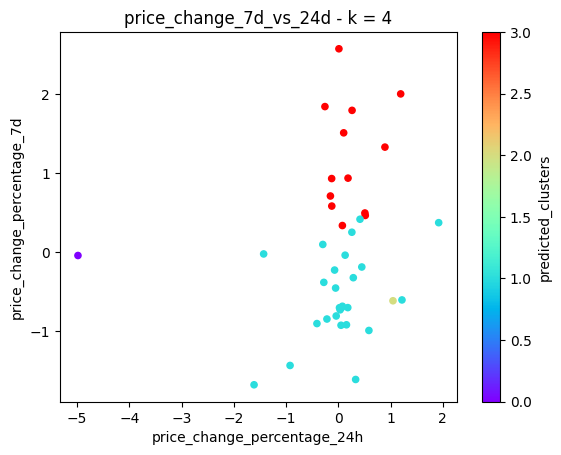

In [47]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_df_predicitions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    title = "price_change_7d_vs_24d - k = 4",
    c="predicted_clusters",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [48]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [49]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_scaled_data = pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame.
pca_scaled_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [50]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**4

In [51]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_scaled_data_df = pd.DataFrame(pca_scaled_data, columns=['PCA1', 'PCA2', 'PCA3'])

#pca_scaled_data_df.head()
# Creating a DataFrame with the PCA data
#scaled_columns = market_data_df.select_dtypes(include=['float64', 'int64']).columns

# Copy the crypto names from the original data
#pca_scaled_data_df = pd.DataFrame(pca_scaled_data_df, index=scaled_df.index)
#pca_scaled_data_df.head()
#pca_scaled_data_df = pd.DataFrame(pca_model.components_.T, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'], index=market_data_df.index)
#pca_scaled_data_df
# Set the coinid column as index
if 'coinid' in scaled_df.columns:
   pca_scaled_data_df.set_index('coinid', inplace=True)
pca_scaled_data_df = pd.DataFrame(pca_scaled_data, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_df.index)
# Display sample data
pca_scaled_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [52]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=1)

    # Fit the model to the data using PCA DataFrame
    kmeans_model.fit(pca_scaled_data_df)

    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k_values,inertia_values
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,27.618972
6,7,21.134056
7,8,17.437664
8,9,13.742792
9,10,10.484890


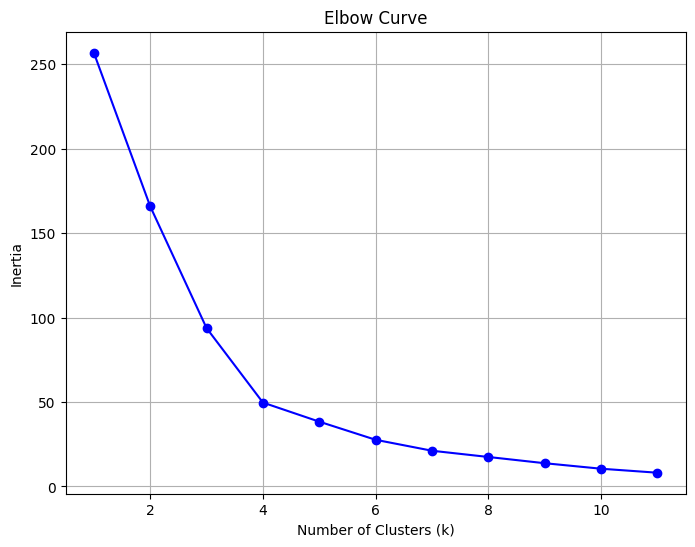

In [53]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [54]:
# Initialize the K-Means model using the best value for k
best_k = 4

best_kmeans_model = KMeans(n_clusters=best_k, random_state=1)


In [55]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(pca_scaled_data_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [56]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = best_kmeans_model.predict(pca_scaled_data_df)

# Print the resulting array of cluster values.
print(predicted_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [57]:
# Create a copy of the DataFrame with the PCA data
clus_pca_scaled_data_df = pca_scaled_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clus_pca_scaled_data_df['P_C'] = predicted_clusters

# Display sample data
clus_pca_scaled_data_df.head()

,PCA1,PCA2,PCA3,P_C
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


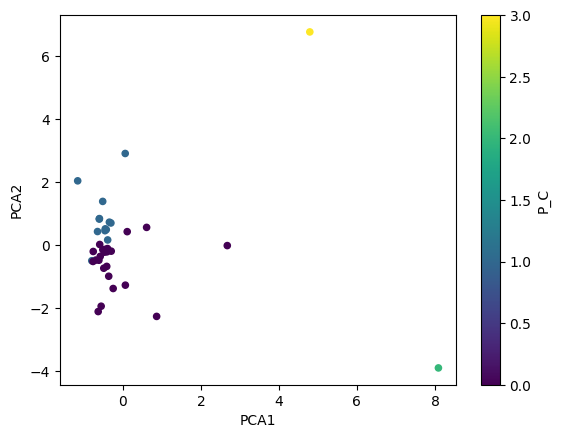

In [58]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.


scatter_plot = clus_pca_scaled_data_df.plot.scatter(
    x='PCA1',
    y='PCA2',
    c='P_C',
    colormap='viridis',

)


### Determine the Weights of Each Feature on each Principal Component

In [59]:
# Fit the PCA model to your data
pca_model.fit(scaled_df)

# Get the feature contributions to each principal component
feature_contributions = pca_model.components_

# Create a DataFrame to display the feature contributions
feature_contributions_df = pd.DataFrame(feature_contributions, columns=scaled_df.columns, index=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'])

# Display the DataFrame
feature_contributions_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA_Component_1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PCA_Component_2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PCA_Component_3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
Component 1:
Strongest Negative Influence: price_change_percentage_24h (-0.416728)
Strongest Positive Influence: price_change_percentage_60d (0.320365)

Component 2:
Strongest Negative Influence: Not explicitly listed, as all influences are positive for this component.
Strongest Positive Influence: price_change_percentage_30d (0.562182)
    
Component 3:
Strongest Negative Influence: price_change_percentage_60d (-0.361377)
Strongest Positive Influence: price_change_percentage_7d (0.787670)